In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


2024-05-15 20:58:50.985954: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 20:58:50.990648: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-15 20:58:51.062201: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 20:58:52.296609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 128
img_height = 129
img_width = 295

train_ds = tf.keras.utils.image_dataset_from_directory(
	"birds",
	validation_split=0.2,
	subset="training",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size,
	color_mode="grayscale")

val_ds = tf.keras.utils.image_dataset_from_directory(
	"birds",
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size,
	color_mode="grayscale")


print(train_ds.class_names)
class_names = train_ds.class_names

Found 5422 files belonging to 5 classes.
Using 4338 files for training.
Found 5422 files belonging to 5 classes.
Using 1084 files for validation.
['American_Robin', "Bewick's_Wren", 'Northern_Cardinal', 'Northern_Mockingbird', 'Song_Sparrow']


2024-05-15 20:59:32.789811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


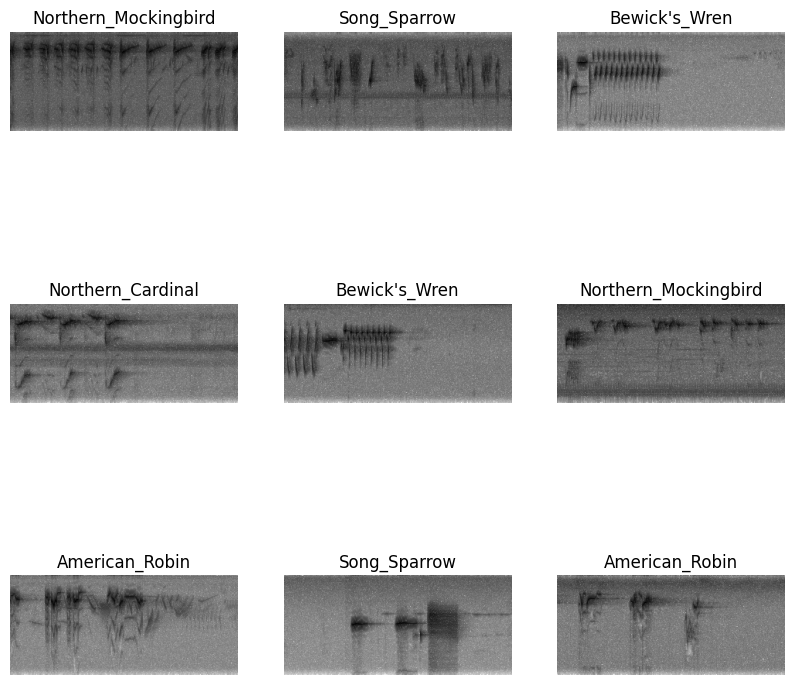

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


/home/nicolas/Documents/hepia/6eme_sem/smart_device/projet/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 129, 295, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 129, 295, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 147, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 147, 16)    │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 73, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 73, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 18, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,053 (164.27 KB)

 Trainable params: 42,053 (164.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2211 - loss: 1.6056 - val_accuracy: 0.2325 - val_loss: 1.5944
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2719 - loss: 1.5906 - val_accuracy: 0.4253 - val_loss: 1.4930
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.4030 - loss: 1.3942 - val_accuracy: 0.4659 - val_loss: 1.1796
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4699 - loss: 1.1777 - val_accuracy: 0.5609 - val_loss: 1.0732
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5503 - loss: 1.0654 - val_accuracy: 0.5978 - val_loss: 1.0069
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6029 - loss: 0.9800 - val_accuracy: 0.6494 - val_loss: 0.9172
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6522 - loss: 0.8946 - val_accuracy: 0.6762 - val_loss: 0.8585
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6754 - loss: 0.8232 - val_accuracy: 0.6928 - val_loss:

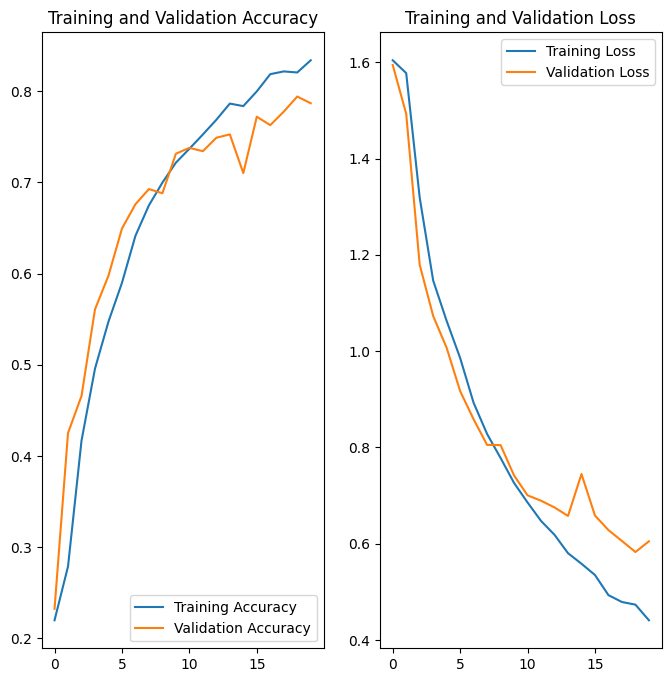

In [6]:
num_classes = len(class_names)

# 74 % val acc
model = Sequential([
	layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.MaxPooling2D(),
	layers.MaxPooling2D(),
	layers.Flatten(),
	layers.Dense(64, activation='relu'),
	layers.Dense(num_classes)
])

model.compile(
	optimizer='adam',
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	metrics=['accuracy']
)

model.summary()

epochs=20
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [7]:
# model.save("birds_74.h5")
model.save("model.keras")

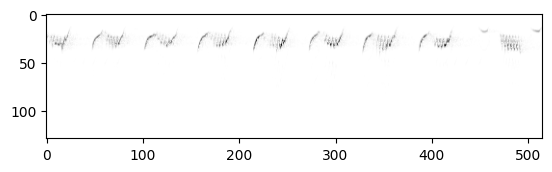

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction : Northern_Mockingbird


In [28]:
from PIL import Image
import numpy as np

img = Image.open("birds/Northern_Mockingbird/13609-2.png")

plt.imshow(img, cmap="gray")
plt.show()


img = np.expand_dims(img, axis=0)
pred = model.predict(np.asarray(img))

predicted_class = np.argmax(pred[0])
predicted_class_name = class_names[predicted_class]
print(f"Prediction : {predicted_class_name}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step


2024-05-15 21:32:40.723417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


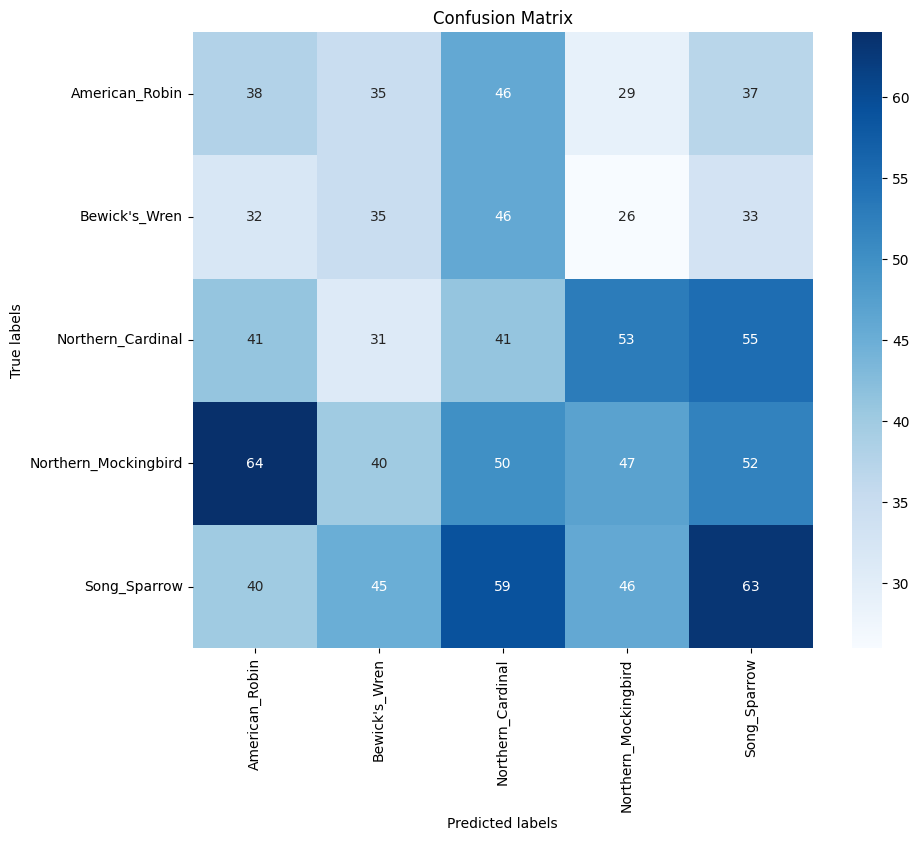

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Faire des prédictions sur l'ensemble de validation
predictions = model.predict(val_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Obtenir les vraies étiquettes de classe
true_classes = np.concatenate([y for x, y in val_ds], axis=0)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [4]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model("birds.keras")

TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_6', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 129, 515, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'rescaling_6_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Rescaling', 'config': {'name': 'rescaling_6', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 129, 515, 1], 'scale': 0.00392156862745098, 'offset': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 129, 515, 1]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_16', 'trainable': True, 'dtype': 'float32', 'filters': 16, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 129, 515, 1]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_18', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 129, 515, 16]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_17', 'trainable': True, 'dtype': 'float32', 'filters': 16, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 257, 16]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_19', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 64, 257, 16]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_18', 'trainable': True, 'dtype': 'float32', 'filters': 16, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 128, 16]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_20', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 32, 128, 16]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_21', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 16, 64, 16]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_22', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 8, 32, 16]}}, {'module': 'keras.layers', 'class_name': 'Flatten', 'config': {'name': 'flatten_6', 'trainable': True, 'dtype': 'float32', 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 4, 16, 16]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_12', 'trainable': True, 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 1024]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_13', 'trainable': True, 'dtype': 'float32', 'units': 5, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64]}}]}, 'registered_name': None, 'build_config': {'input_shape': [None, 129, 515, 1]}, 'compile_config': {'optimizer': 'adam', 'loss': {'module': 'keras.losses', 'class_name': 'SparseCategoricalCrossentropy', 'config': {'reduction': 'auto', 'name': 'sparse_categorical_crossentropy', 'from_logits': True, 'ignore_class': None, 'fn': 'sparse_categorical_crossentropy'}, 'registered_name': None}, 'metrics': ['accuracy'], 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}.

Exception encountered: <class 'keras.src.layers.preprocessing.rescaling.Rescaling'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'Rescaling', 'config': {'name': 'rescaling_6', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 129, 515, 1], 'scale': 0.00392156862745098, 'offset': 0.0}, 'registered_name': None, 'build_config': {'input_shape': [None, 129, 515, 1]}}.

Exception encountered: Error when deserializing class 'Rescaling' using config={'name': 'rescaling_6', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 129, 515, 1], 'scale': 0.00392156862745098, 'offset': 0.0}.

Exception encountered: Unrecognized keyword arguments passed to Rescaling: {'batch_input_shape': [None, 129, 515, 1]}

In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

open("tflite_model/birds_model.tflite",  "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp98uqd0dg/assets


INFO:tensorflow:Assets written to: /tmp/tmp98uqd0dg/assets
2024-05-02 13:37:21.114731: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-05-02 13:37:21.114778: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-05-02 13:37:21.115084: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp98uqd0dg
2024-05-02 13:37:21.117380: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-02 13:37:21.117398: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp98uqd0dg
2024-05-02 13:37:21.124071: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-05-02 13:37:21.194373: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmp98uqd0dg
2024-05-02 13:37:21.217105: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

77576

In [22]:
from tensorflow.lite.python.util import convert_bytes_to_c_source

source_text, header_text = convert_bytes_to_c_source(tflite_model,  "tflite_model/bird_model")

with  open('tflite_model/bird_model.h',  'w')  as  file:
    file.write(header_text)

with  open('tflite_model/bird_model.cc',  'w')  as  file:
    file.write(source_text)
